In [2]:
import pandas as pd

file_path = './data/final/train/200kg_B운전자데이터.csv'
data = pd.read_csv(file_path)
data.head()

,Time[s],Signal A,Signal B,Signal C,Sensor A,Sensor B,Sensor C,Sensor D
0,0.00,316.071968,316.071968,316.071968,694.733218,376.534793,316.071968,547.675331
1,0.01,316.071968,316.071968,316.071968,694.733218,376.534793,316.071968,547.675331
2,0.02,316.071968,316.071968,316.071968,695.026744,375.360691,316.071968,548.217010
3,0.03,316.071968,316.071968,316.071968,696.018633,374.485206,316.071968,548.452854
4,0.04,316.071968,316.071968,316.071968,695.224758,375.004555,316.071968,548.421063


In [3]:
# Descriptive statistics of the dataset
descriptive_stats = data.describe()
descriptive_stats

,Time[s],Signal A,Signal B,Signal C,Sensor A,Sensor B,Sensor C,Sensor D
count,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000
mean,47.875000,320.280146,315.856645,316.619291,649.097028,345.911181,349.529302,557.628016
std,27.644974,11.688128,7.641889,5.959884,37.284540,35.718492,47.672883,81.728629
min,0.000000,304.901717,301.191965,300.741055,523.125975,316.071968,316.071968,399.647581
25%,23.937500,309.021388,307.689156,316.071968,619.168646,316.584365,316.071968,505.658150
50%,47.875000,316.071968,316.071968,316.071968,647.554241,324.685456,317.600655,539.141150
75%,71.812500,330.410269,322.712631,316.071968,683.265514,374.736635,373.833873,591.690699
max,95.750000,339.642222,327.590649,332.448171,728.513968,492.796111,496.944336,762.188567


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

Time[s]     0
Signal A    0
Signal B    0
Signal C    0
Sensor A    0
Sensor B    0
Sensor C    0
Sensor D    0
dtype: int64

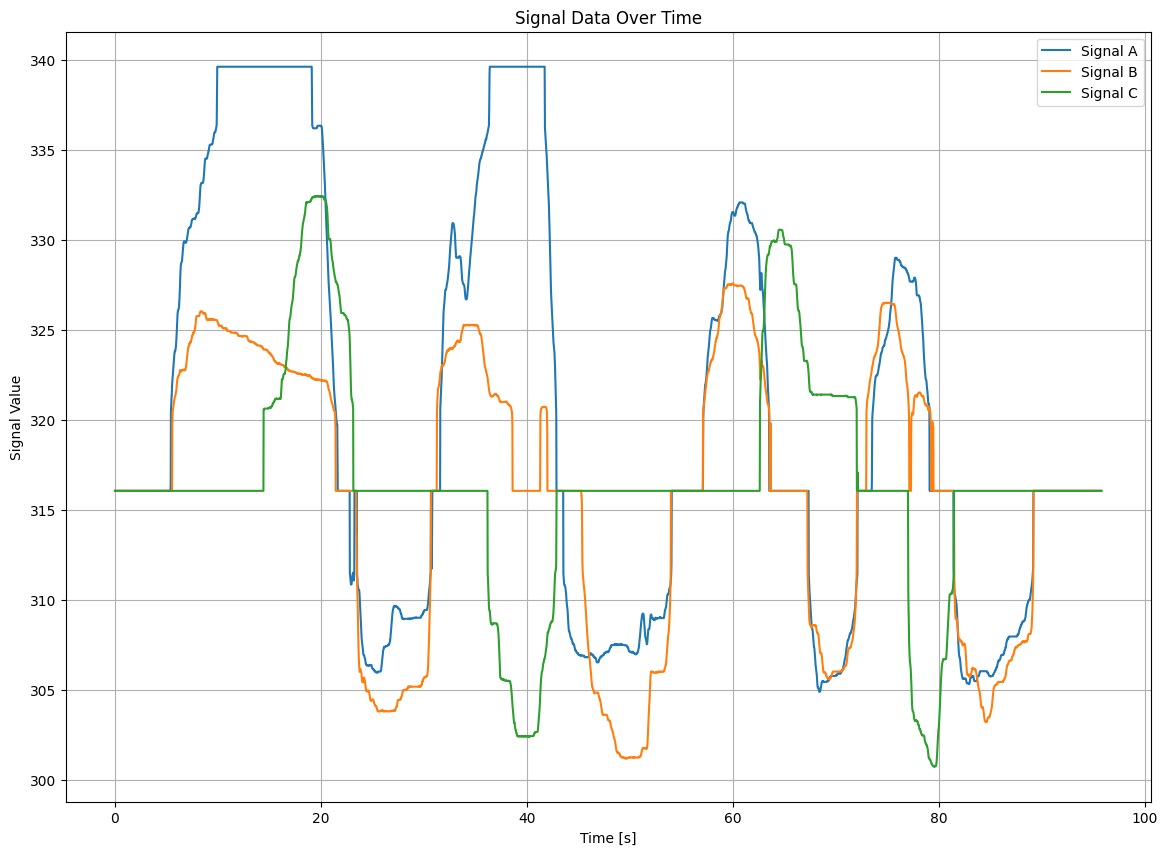

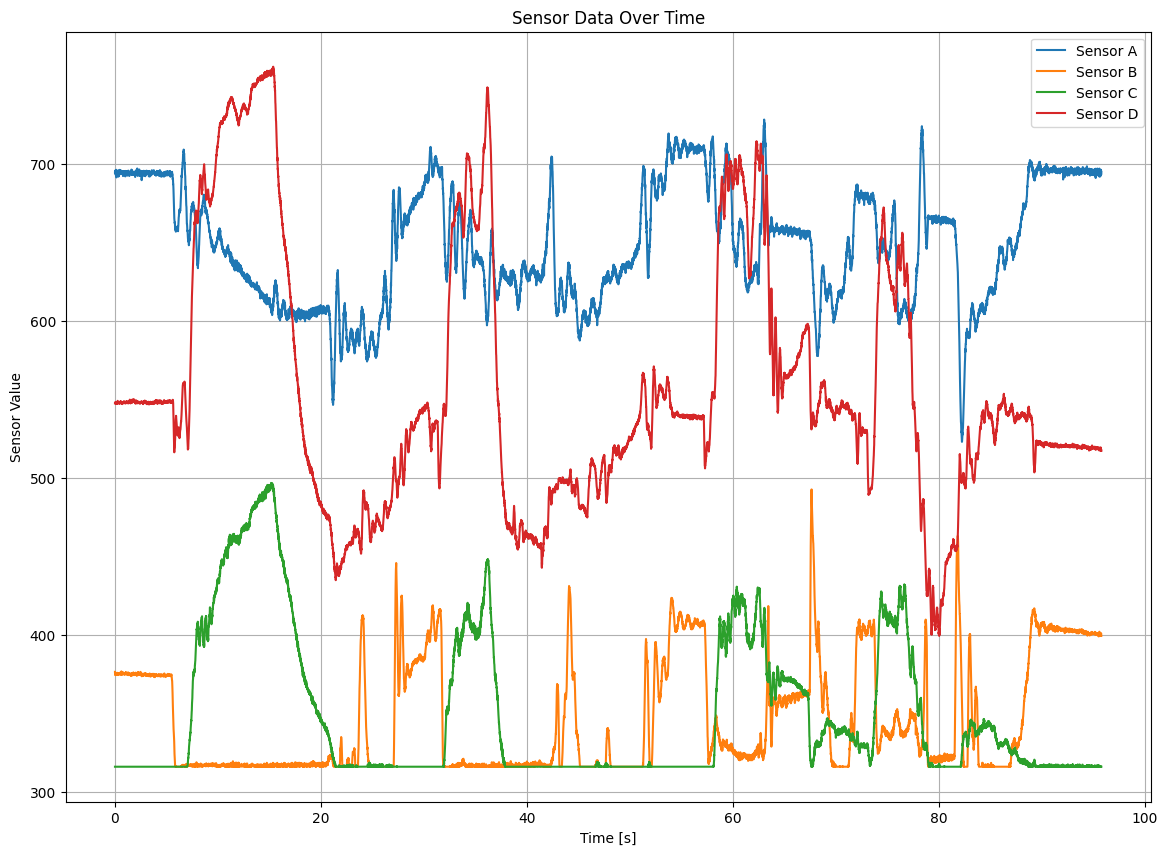

In [6]:
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(14, 10))

# Plot each signal
for column in data.columns[1:4]:  # Skipping the 'Time[s]' column
    plt.plot(data['Time[s]'], data[column], label=column)

# Adding titles and labels
plt.title('Signal Data Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig('signal.png')
plt.show()

# We will create a separate plot for sensors to avoid clutter
plt.figure(figsize=(14, 10))

# Plot each sensor
for column in data.columns[4:]:  # Skipping the 'Time[s]' and signal columns
    plt.plot(data['Time[s]'], data[column], label=column)

# Adding titles and labels
plt.title('Sensor Data Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)

# Show the plot

plt.savefig('sensor.png')
plt.show()

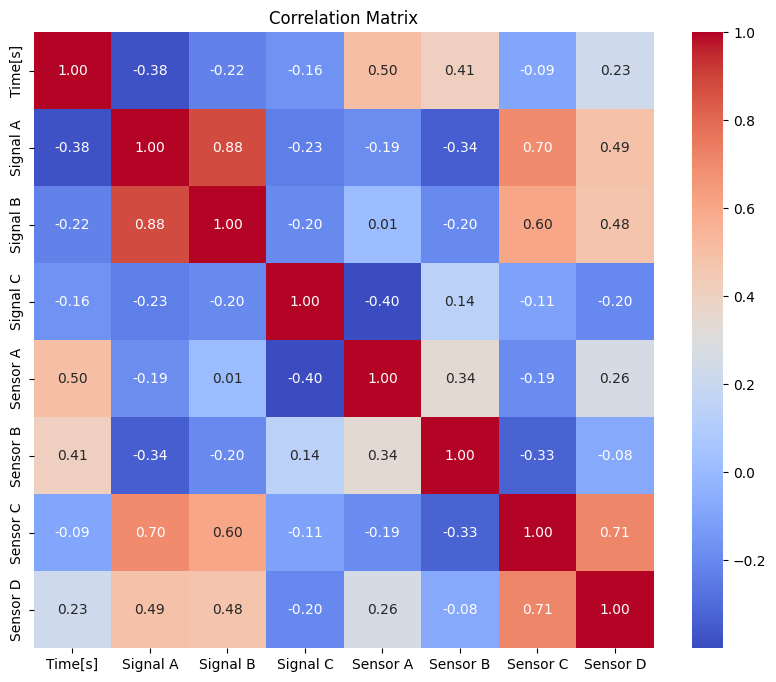

In [13]:
import seaborn as sns
import pandas as pd

file_path = './open/train/602kg_A운전자데이터.csv'
data = pd.read_csv(file_path)
data.head()

# Plotting the correlation matrix again after importing seaborn
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('./CM.png')
plt.show()

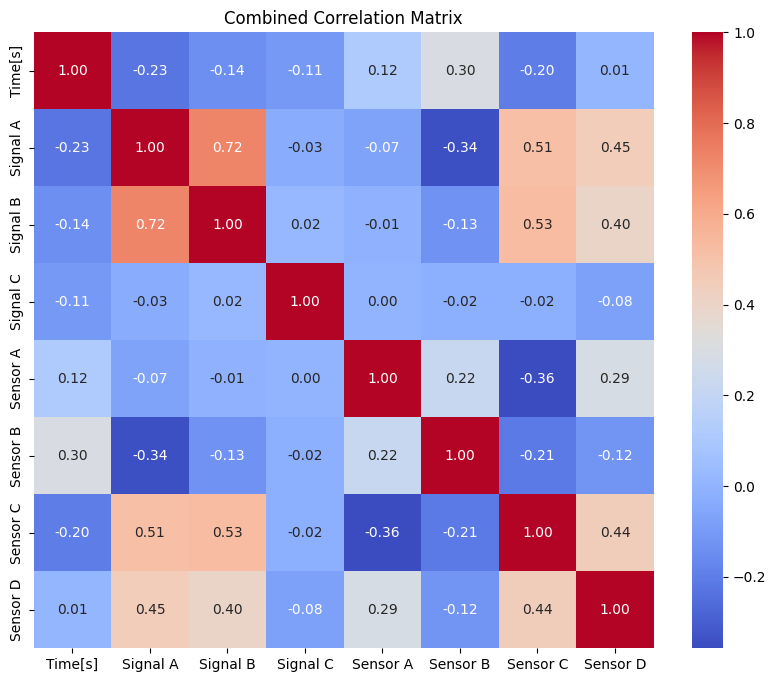

'./combined_correlation_matrix.png'

In [15]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory where the datasets are stored
directory_path = './open/train/'

# List all CSV files in the directory that match the pattern '운전자데이터.csv'
file_pattern = '운전자데이터.csv'
all_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith(file_pattern)]

# Load and concatenate all datasets into one DataFrame
all_data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# Compute the correlation matrix for the combined data
combined_correlation_matrix = all_data.corr()

# Show the combined correlation matrix
combined_correlation_matrix



# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap for the combined correlation matrix
sns.heatmap(combined_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title('Combined Correlation Matrix')

# Save the figure
heatmap_file_path = './combined_correlation_matrix.png'
plt.savefig(heatmap_file_path)

# Show the heatmap
plt.show()

# Return the file path for download
heatmap_file_path


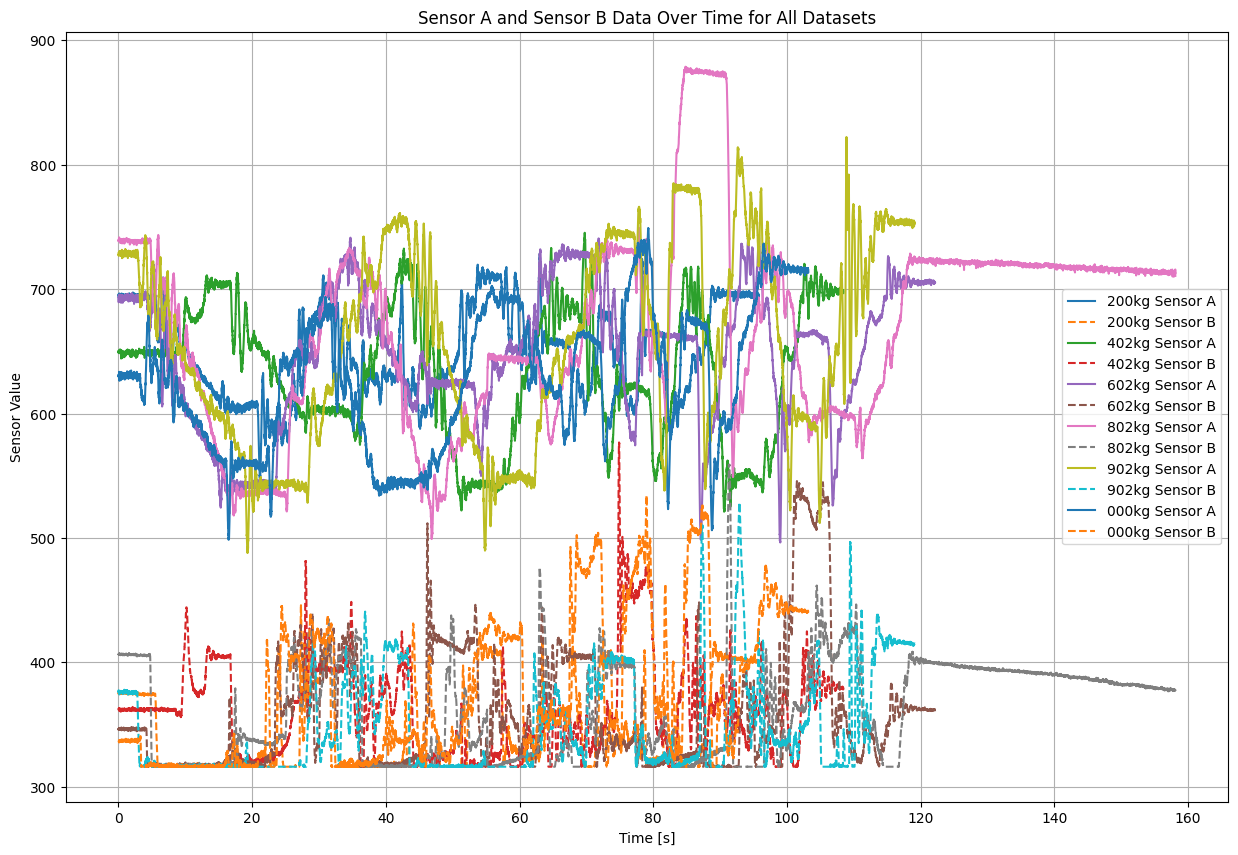

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# File paths for all datasets
file_paths = [
    './open/train/200kg_B운전자데이터.csv',
    './open/train//402kg_B운전자데이터.csv',
    './open/train//602kg_B운전자데이터.csv',
    './open/train//802kg_B운전자데이터.csv',
    './open/train//902kg_B운전자데이터.csv',
    './open/train//000kg_B운전자데이터.csv'
]

# Load all datasets into a dictionary
datasets = {}
for file_path in file_paths:
    # Extract the weight from the file name
    weight = file_path.split('/')[-1].split('kg')[0]
    # Load the dataset
    datasets[weight] = pd.read_csv(file_path)

# Set up the figure for plotting
plt.figure(figsize=(15, 10))

# Loop through each dataset and plot Sensor A and Sensor B
for weight, dataset in datasets.items():
    # Plot Sensor A
    plt.plot(dataset['Time[s]'], dataset['Sensor A'], label=f'{weight}kg Sensor A')
    # Plot Sensor B
    plt.plot(dataset['Time[s]'], dataset['Sensor B'], label=f'{weight}kg Sensor B', linestyle='--')

# Adding titles and labels
plt.title('Sensor A and Sensor B Data Over Time for All Datasets')
plt.xlabel('Time [s]')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)

# Show the combined plot
plt.show()


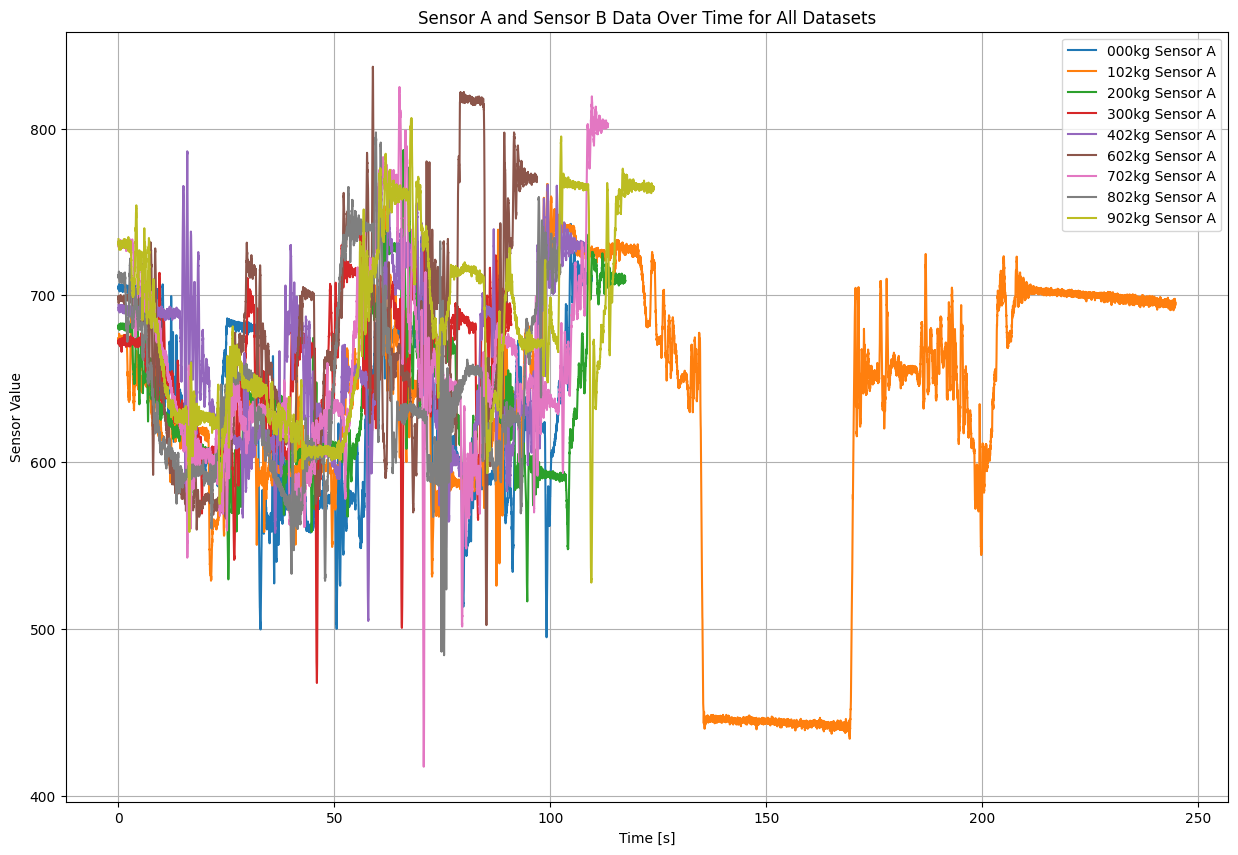

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# File paths for all datasets
file_paths = [
    './open/train/000kg_A운전자데이터.csv',
    './open/train/102kg_A운전자데이터.csv',
    './open/train/200kg_A운전자데이터.csv',
    './open/train/300kg_A운전자데이터.csv',
    './open/train/402kg_A운전자데이터.csv',
    './open/train/602kg_A운전자데이터.csv',
    './open/train/702kg_A운전자데이터.csv',
    './open/train/802kg_A운전자데이터.csv',
    './open/train/902kg_A운전자데이터.csv'
]

# Load all datasets into a dictionary
datasets = {}
for file_path in file_paths:
    # Extract the weight from the file name
    weight = file_path.split('/')[-1].split('kg')[0]
    # Load the dataset
    datasets[weight] = pd.read_csv(file_path)

# Set up the figure for plotting
plt.figure(figsize=(15, 10))

# Loop through each dataset and plot Sensor A and Sensor B
for weight, dataset in datasets.items():
    # Plot Sensor A
    plt.plot(dataset['Time[s]'], dataset['Sensor A'], label=f'{weight}kg Sensor A')
    # Plot Sensor B
    # plt.plot(dataset['Time[s]'], dataset['Sensor B'], label=f'{weight}kg Sensor B', linestyle='--')

# Adding titles and labels
plt.title('Sensor A and Sensor B Data Over Time for All Datasets')
plt.xlabel('Time [s]')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)

# Show the combined plot
plt.show()


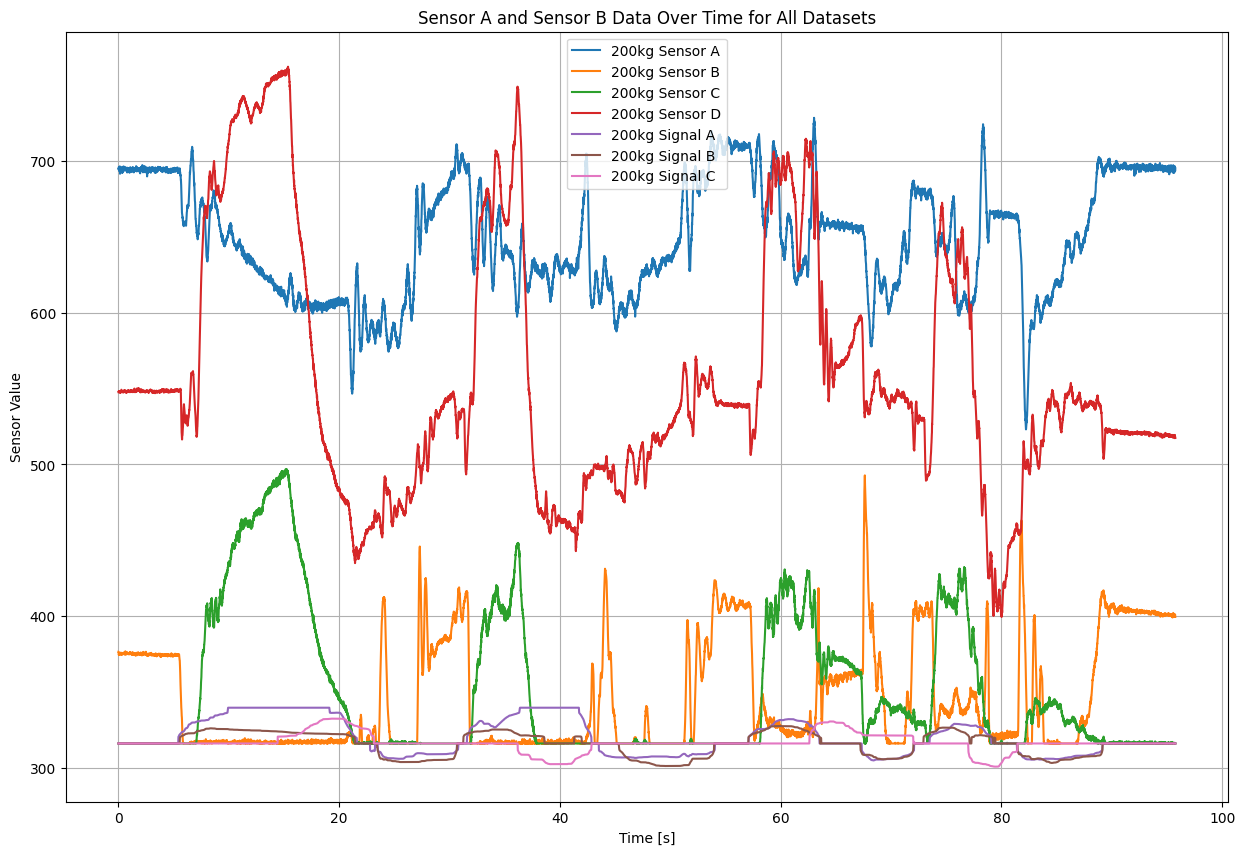

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# File paths for all datasets
file_paths = [
    './train/200kg_B운전자데이터.csv',
    # './train//402kg_B운전자데이터.csv',
    # './train//602kg_B운전자데이터.csv',
    # './train//802kg_B운전자데이터.csv',
    # './train//902kg_B운전자데이터.csv',
    # './train//000kg_B운전자데이터.csv',
    # './test/0a12hop6_B운전자데이터.csv'
]

# Load all datasets into a dictionary
datasets = {}
for file_path in file_paths:
    # Extract the weight from the file name
    weight = file_path.split('/')[-1].split('kg')[0]
    # Load the dataset
    datasets[weight] = pd.read_csv(file_path)

# Set up the figure for plotting
plt.figure(figsize=(15, 10))

# Loop through each dataset and plot Sensor A and Sensor B
for weight, dataset in datasets.items():
    plt.plot(dataset['Time[s]'], dataset['Sensor A'], label=f'{weight}kg Sensor A')
    plt.plot(dataset['Time[s]'], dataset['Sensor B'], label=f'{weight}kg Sensor B')
    plt.plot(dataset['Time[s]'], dataset['Sensor C'], label=f'{weight}kg Sensor C')
    plt.plot(dataset['Time[s]'], dataset['Sensor D'], label=f'{weight}kg Sensor D')
    plt.plot(dataset['Time[s]'], dataset['Signal A'], label=f'{weight}kg Signal A')
    plt.plot(dataset['Time[s]'], dataset['Signal B'], label=f'{weight}kg Signal B')
    plt.plot(dataset['Time[s]'], dataset['Signal C'], label=f'{weight}kg Signal C')

# Adding titles and labels
plt.title('Sensor A and Sensor B Data Over Time for All Datasets')
plt.xlabel('Time [s]')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)

# Show the combined plot
plt.show()


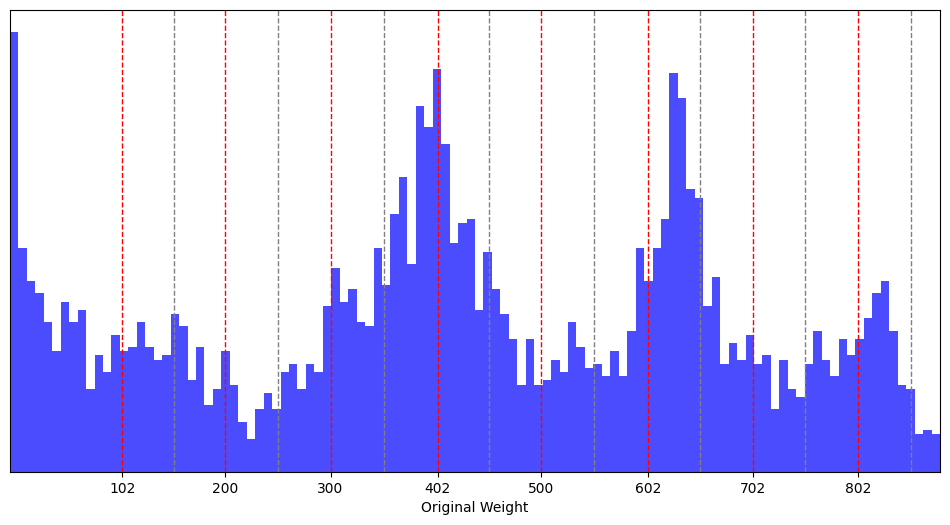

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = './pred.csv'  # Update this to your local file path
data = pd.read_csv(file_path)

# Define the map_predictions function as provided
def map_predictions(predictions, target_values):
    mapped_predictions = []
    for pred in predictions:
        differences = np.abs(target_values - pred)
        index_of_min_diff = np.argmin(differences)
        mapped_predictions.append(target_values[index_of_min_diff])
    return np.array(mapped_predictions)

# Define the target_values as provided
target_values = np.array([102, 200, 300, 402, 500, 602, 702, 802, 902])

# Plot the detailed distribution of original weights with target_values and midpoints
plt.figure(figsize=(12, 6))

# Calculate the range of weights for detailed bin size
weight_range = data['weight'].max() - data['weight'].min()
bin_size = weight_range // 100  # Calculate a bin size for detailed distribution
bins = int(weight_range // bin_size)  # Number of bins

# Plot histogram of original weights with more bins for detail
plt.hist(data['weight'], bins=bins, color='blue', alpha=0.7)

# Draw vertical lines for target_values and their midpoints
for i, target in enumerate(target_values):
    plt.axvline(x=target, color='red', linestyle='--', linewidth=1)
    # Draw midpoints for all but the last target value
    if i < len(target_values) - 1:
        midpoint = (target + target_values[i+1]) / 2
        plt.axvline(x=midpoint, color='grey', linestyle='--', linewidth=1)

# Set x-ticks to be the target_values
plt.xticks(target_values)

# Remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlim([data['weight'].min(), data['weight'].max()])
# Create labels
# plt.title('Detailed Distribution of Original Weights with Target Values and Midpoints')
plt.xlabel('Original Weight')
plt.savefig('./pred.png')
# Show the plot
plt.show()


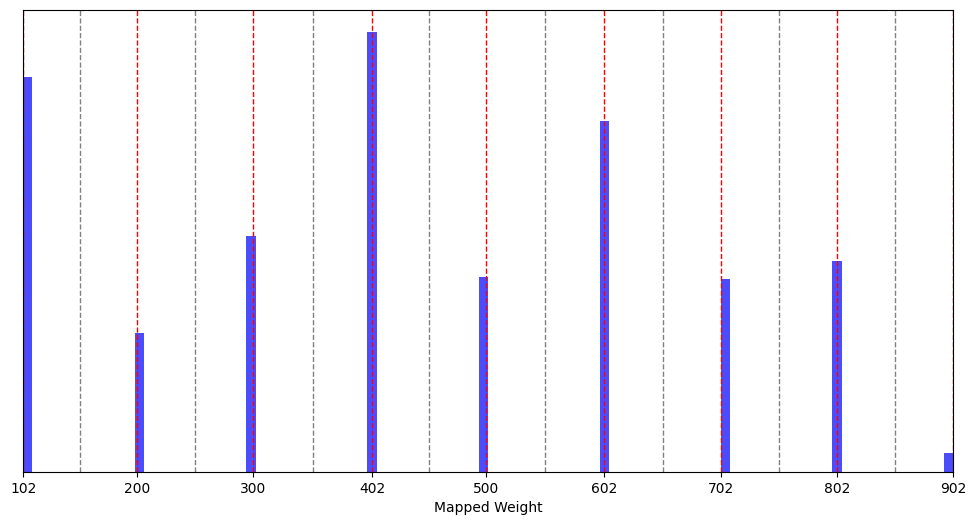

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = './mapped_pred.csv'  # Update this to your local file path
data = pd.read_csv(file_path)

# Define the map_predictions function as provided
def map_predictions(predictions, target_values):
    mapped_predictions = []
    for pred in predictions:
        differences = np.abs(target_values - pred)
        index_of_min_diff = np.argmin(differences)
        mapped_predictions.append(target_values[index_of_min_diff])
    return np.array(mapped_predictions)

# Define the target_values as provided
target_values = np.array([102, 200, 300, 402, 500, 602, 702, 802, 902])

# Plot the detailed distribution of original weights with target_values and midpoints
plt.figure(figsize=(12, 6))

# Calculate the range of weights for detailed bin size
weight_range = data['weight'].max() - data['weight'].min()
bin_size = weight_range // 100  # Calculate a bin size for detailed distribution
bins = int(weight_range // bin_size)  # Number of bins

# Plot histogram of original weights with more bins for detail
plt.hist(data['weight'], bins=bins, color='blue', alpha=0.7)

# Draw vertical lines for target_values and their midpoints
for i, target in enumerate(target_values):
    plt.axvline(x=target, color='red', linestyle='--', linewidth=1)
    # Draw midpoints for all but the last target value
    if i < len(target_values) - 1:
        midpoint = (target + target_values[i+1]) / 2
        plt.axvline(x=midpoint, color='grey', linestyle='--', linewidth=1)

# Set x-ticks to be the target_values
plt.xticks(target_values)

# Remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

plt.xlim([data['weight'].min(), data['weight'].max()])

# Create labels
# plt.title('Detailed Distribution of Original Weights with Target Values and Midpoints')
plt.xlabel('Mapped Weight')

# Show the plot
plt.savefig('./mapped_pred.png')
plt.show()
